In [323]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

file = "Customer_data.csv"
df = pd.read_csv(file).drop(columns="Unnamed: 0",axis=1) #Dropping column that gives no info

plt.style.use('seaborn')

In [324]:
#EDA
#to select one column #print(df['Total Spending'].describe()) 
df.describe()

,Age,Annual Income,Total Spending
count,1598.000000,1596.000000,1600.000000
mean,37.895494,187.129699,2575.600781
std,16.226009,5004.797654,1453.083432
min,14.000000,-100.000000,-102.500000
25%,28.000000,39.000000,1383.750000
50%,35.000000,65.000000,2511.250000
75%,47.000000,81.000000,3843.750000
max,350.000000,200000.000000,5176.250000


In [325]:
df.isnull().sum()

Gender            0
Age               2
Annual Income     4
Total Spending    0
Interests         0
dtype: int64

In [326]:
df=df.dropna()
df.isnull().sum()

Gender            0
Age               0
Annual Income     0
Total Spending    0
Interests         0
dtype: int64

Histograms to see variation in each numeric variable
(There's got to be a better way to do this automatically, with automatic column-name-based titles)

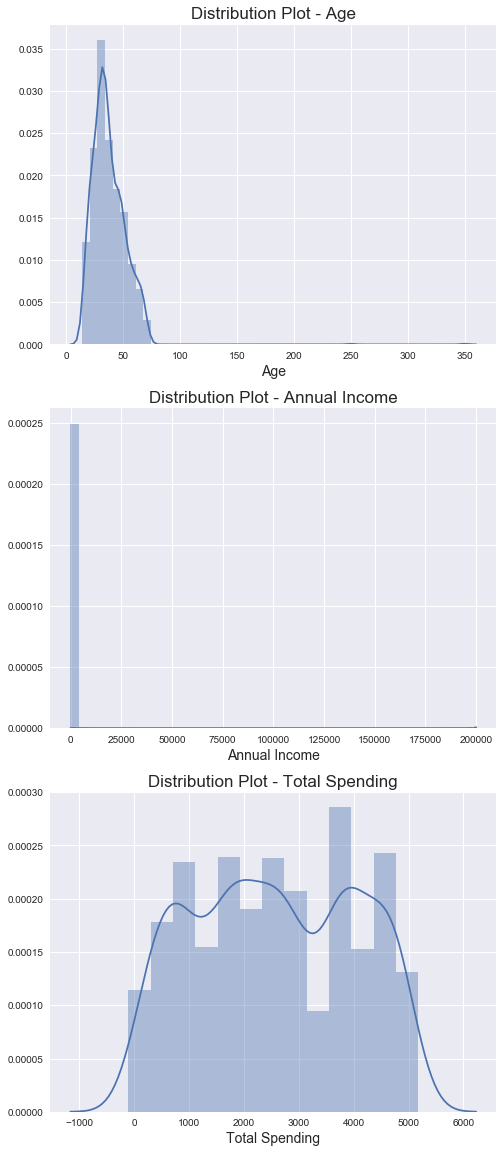

In [327]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

fig, ax = plt.subplots(len(list(df_num)), figsize=(8,20))

for i, col in enumerate(list(df_num)):
    sns.distplot(df[col], ax=ax[i])
    ax[i].set_title('Distribution Plot - {}'.format(col), fontsize=17)
    ax[i].set_xlabel(col, fontsize=14)

plt.show()
    


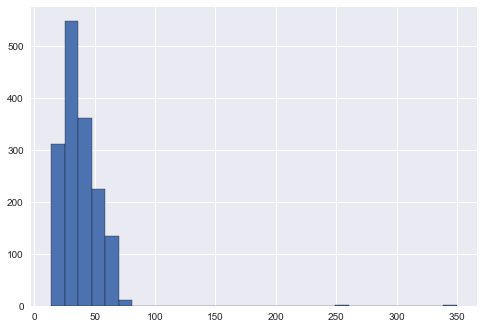

In [328]:
df.loc[:,'Age'].hist(bins = 30, edgecolor='black')

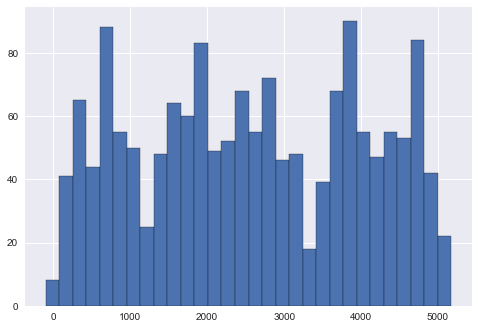

In [329]:
df.loc[:,'Total Spending'].hist(bins = 30, edgecolor='black')

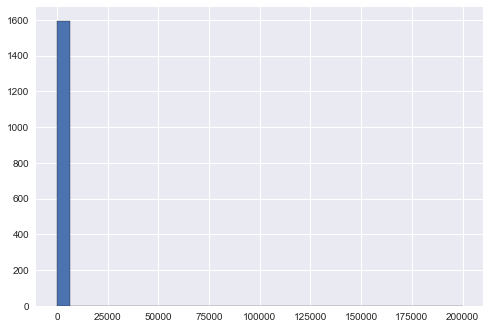

In [330]:
df.loc[:,'Annual Income'].hist(bins = 30, edgecolor='black')

Let's narrow our scope of income to get a better picture

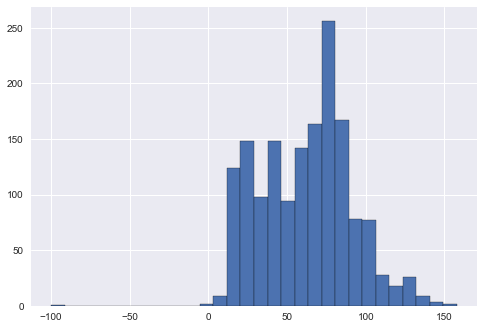

In [331]:
income_filter = df.loc[:, 'Annual Income'] <= 250
df.loc[income_filter,'Annual Income'].hist(bins = 30, edgecolor='black')

In [332]:
df.head()

,Gender,Age,Annual Income,Total Spending,Interests
0,male,22.0,16.0,512.50,Cooking
1,male,34.0,12.0,358.75,Exercise
2,male,64.0,13.0,153.75,Travel
3,male,70.0,13.0,717.50,Crafts
4,female,58.0,22.0,820.00,Travel


In [333]:
df.corr()

,Age,Annual Income,Total Spending
Age,1.000000,-0.015438,-0.318380
Annual Income,-0.015438,1.000000,0.025477
Total Spending,-0.318380,0.025477,1.000000


There's no correlation between age and annual income. Does the -.032 say that age and total spending have a slight negative relationship?  

In [334]:
df.nunique()

Gender              2
Age                62
Annual Income     141
Total Spending    104
Interests          19
dtype: int64

In [335]:
# Our style choices
#plt.style.available
plt.style.use('default')

Delete Outliers:  

In [336]:
#This ultimately gives less control over which outliers you're deleting; not good to use here because too many entires are deleted.  We don't in face want to delete outliers; we just want to delete the erroneous cases 

from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .01
    high = .99
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) 
               & (df[name] < quant_df.loc[high, name])]
    return df

#uncomment to remove outliers
#df = remove_outlier(df)

In [337]:
#df.nunique()

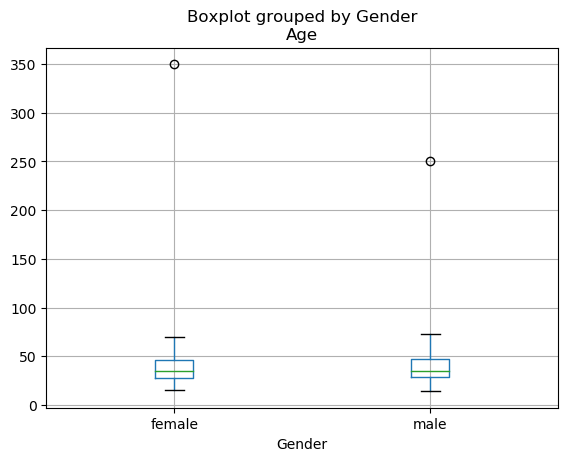

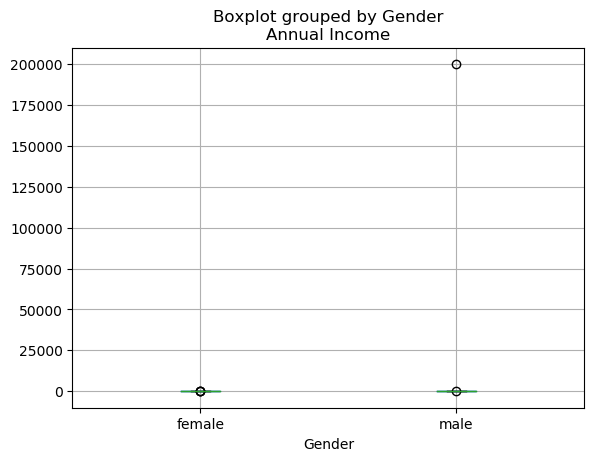

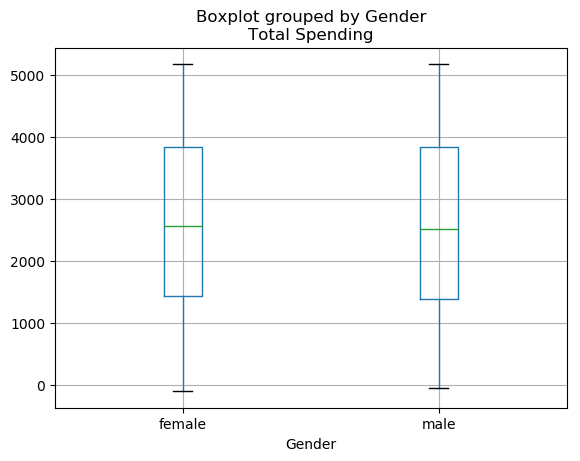

In [338]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
for i, col_val in enumerate(list(df_num)): #list(df) is a list of the column names of the df

    df.boxplot(col_val,by='Gender')
  # plt.title('');
   # plt.suptitle('');

Data Cleaning: getting rid of erroneous data 

In [339]:
df.sort_values(by=['Total Spending'])

,Gender,Age,Annual Income,Total Spending,Interests
22,female,30.0,78.0,-102.50,Strategic games
44,female,35.0,78.0,-51.25,Music
278,male,37.0,76.0,-51.25,Technology
42,female,37.0,82.0,-51.25,Travel
143,male,35.0,80.0,0.00,Automobiles
173,female,32.0,79.0,0.00,Hiking
88,male,32.0,79.0,51.25,Crafts
6,male,48.0,29.0,51.25,Travel
21,female,38.0,76.0,102.50,Camping
148,male,20.0,73.0,102.50,Exercise


In [340]:
# Get names of indexes for which column Total Spending has value 0 or less
indexNames = df[df['Total Spending'] <= 0 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.sort_values(by=['Total Spending']).head()

,Gender,Age,Annual Income,Total Spending,Interests
88,male,32.0,79.0,51.25,Crafts
6,male,48.0,29.0,51.25,Travel
134,male,33.0,78.0,102.50,Crafts
215,female,55.0,79.0,102.50,Exercise
95,male,60.0,35.0,102.50,Entertainment


In [341]:
df.sort_values(by=['Age'], ascending=False).head()

,Gender,Age,Annual Income,Total Spending,Interests
500,female,350.0,75.0,1845.00,Photography
5,male,250.0,21.0,820.00,Reading
883,male,73.0,60.0,2613.75,Camping
673,male,72.0,48.0,2665.00,Automobiles
860,male,71.0,47.0,2357.50,Art


In [342]:
df.sort_values(by=['Age']).head()

,Gender,Age,Annual Income,Total Spending,Interests
743,male,14.0,65.0,2511.25,Strategic games
1161,male,15.0,46.0,4715.00,Art
937,male,15.0,58.0,2408.75,Yoga
629,female,15.0,57.0,1947.50,Exercise
668,male,15.0,50.0,2767.50,Crafts


In [343]:
# Get names of indexes we want to delete
indexNames = df[df['Age'] >= 120 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.sort_values(by=['Age']).tail()

,Gender,Age,Annual Income,Total Spending,Interests
808,male,70.0,49.0,2818.75,Entertainment
860,male,71.0,47.0,2357.50,Art
106,male,71.0,24.0,871.25,Reading
673,male,72.0,48.0,2665.00,Automobiles
883,male,73.0,60.0,2613.75,Camping


In [344]:
df.sort_values(by=['Annual Income']).head()

,Gender,Age,Annual Income,Total Spending,Interests
940,female,58.0,-100.0,2408.75,Pets
1090,male,34.0,0.0,5022.50,Travel
1314,female,22.0,3.0,4868.75,Gardening
1277,female,24.0,4.0,4305.00,Music
1187,male,34.0,6.0,5176.25,Yoga


In [345]:
df.sort_values(by=['Annual Income']).tail()

,Gender,Age,Annual Income,Total Spending,Interests
33,male,33.0,142.0,871.25,Photography
1047,female,31.0,148.0,4202.50,Hiking
1119,female,29.0,152.0,4253.75,Travel
1143,male,32.0,158.0,4305.00,Travel
1430,male,28.0,200000.0,4048.75,Music


In [346]:
# Get names of indexes we want to delete
indexNames = df[(df['Annual Income'] < 0) | (df['Annual Income'] > 200)].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.sort_values(by=['Annual Income']).tail()

,Gender,Age,Annual Income,Total Spending,Interests
1295,male,29.0,142.0,4253.75,Strategic games
33,male,33.0,142.0,871.25,Photography
1047,female,31.0,148.0,4202.50,Hiking
1119,female,29.0,152.0,4253.75,Travel
1143,male,32.0,158.0,4305.00,Travel


In [347]:
df.sort_values(by=['Annual Income']).head()

,Gender,Age,Annual Income,Total Spending,Interests
1090,male,34.0,0.0,5022.50,Travel
1314,female,22.0,3.0,4868.75,Gardening
1277,female,24.0,4.0,4305.00,Music
1187,male,34.0,6.0,5176.25,Yoga
1229,male,17.0,7.0,4766.25,Entertainment


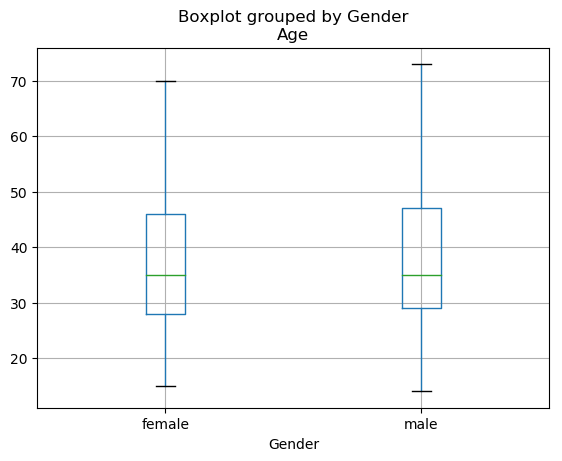

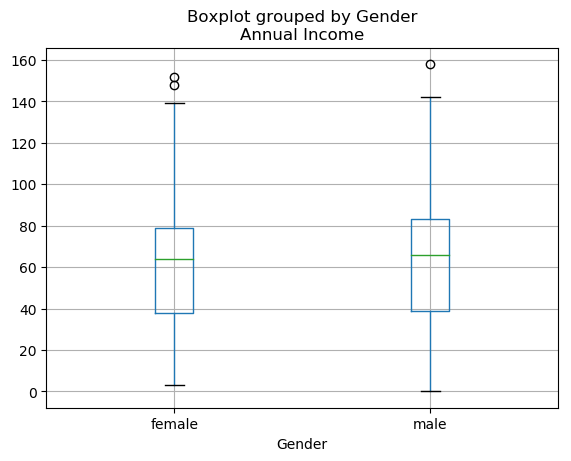

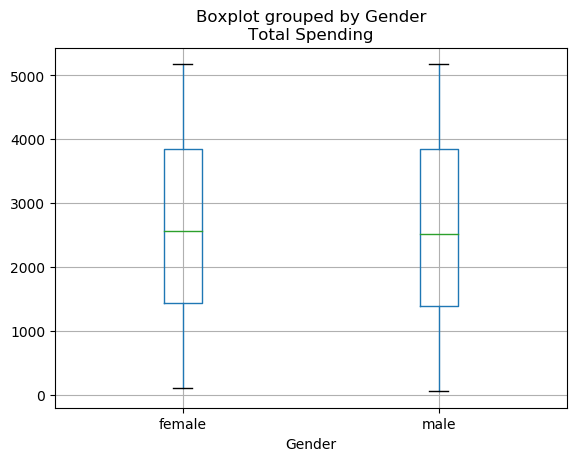

In [348]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
for i, col_val in enumerate(list(df_num)): #list(df) is a list of the column names of the df

    df.boxplot(col_val,by='Gender')
  # plt.title('');
   # plt.suptitle('');

Text(0.5, 1.0, 'Total Spending by Interest')

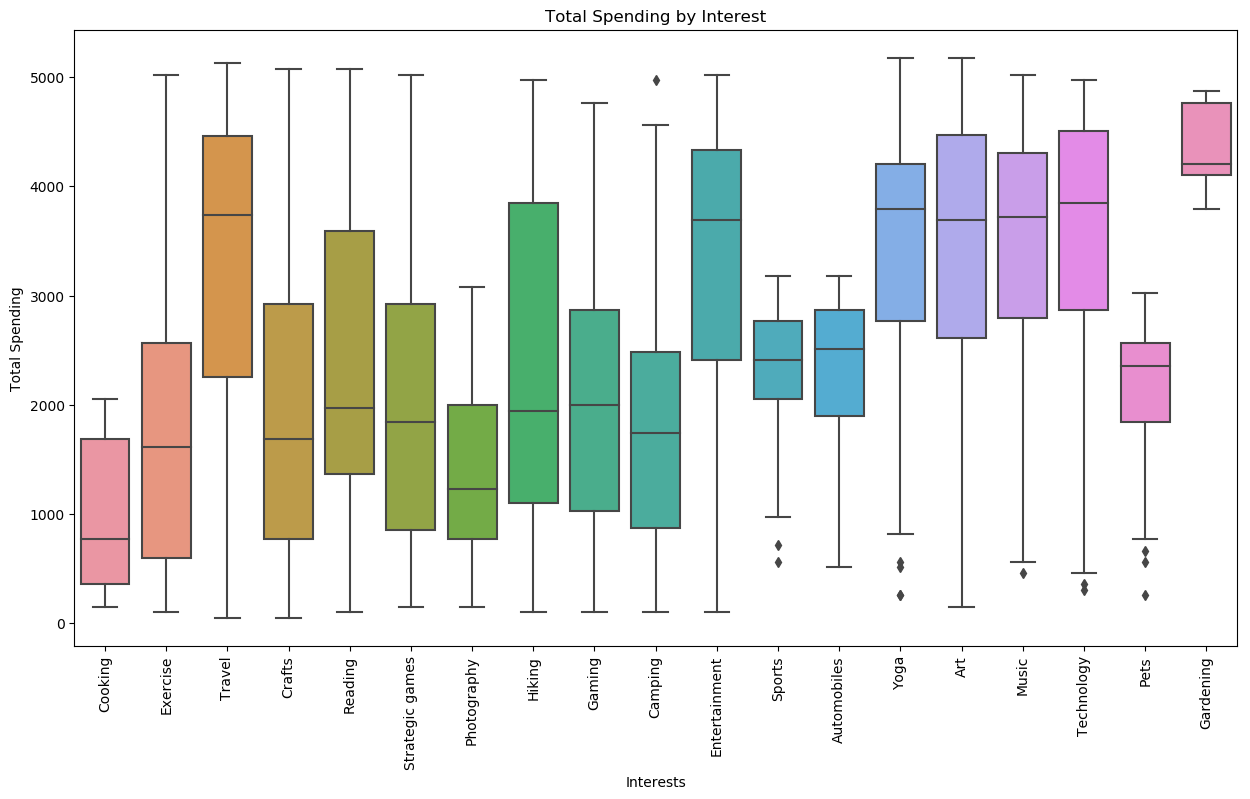

In [349]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='Interests',y='Total Spending',data=df)
plt.xticks(rotation=90)
plt.title('Total Spending by Interest')
#plt.figure(figsize = (30,15))

K means clustering
We must encode string data, Interests and gender, to numeric in order to perform kmeans


In [350]:
#Label Encoding with sklearn
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["interest_code"] = lb_make.fit_transform(df["Interests"])
df["gender_code"] = lb_make.fit_transform(df["Gender"])

df.head()

,Gender,Age,Annual Income,Total Spending,Interests,interest_code,gender_code
0,male,22.0,16.0,512.50,Cooking,3,1
1,male,34.0,12.0,358.75,Exercise,6,1
2,male,64.0,13.0,153.75,Travel,17,1
3,male,70.0,13.0,717.50,Crafts,4,1
4,female,58.0,22.0,820.00,Travel,17,0


In [369]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing

SAMPLE_SIZE = .8  #training data is 80%
RANDOM_STATE = 41
NUM_ITER = 50      # n
NUM_ATTEMPTS = 10      # m

X_unsorted = df[['Age','Annual Income', 'Total Spending', 'interest_code', 'gender_code']].sample(frac=SAMPLE_SIZE, random_state=RANDOM_STATE, replace=False)
X5=X_unsorted.sort_index().values
#X.head()

X_unsorted = df[['Annual Income', 'Total Spending']].sample(frac=SAMPLE_SIZE, random_state=RANDOM_STATE, replace=False)
X=X_unsorted.sort_index().values #.values turns dataframe to np array

In [362]:
clf = KMeans(n_clusters=5, init='random', max_iter=10, n_init=10)#, verbose=1)
clf.fit(X)

## to see which group each case was assigned to:
y_pred = clf.fit_predict(X)

In [363]:
y_pred

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [364]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

In [365]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

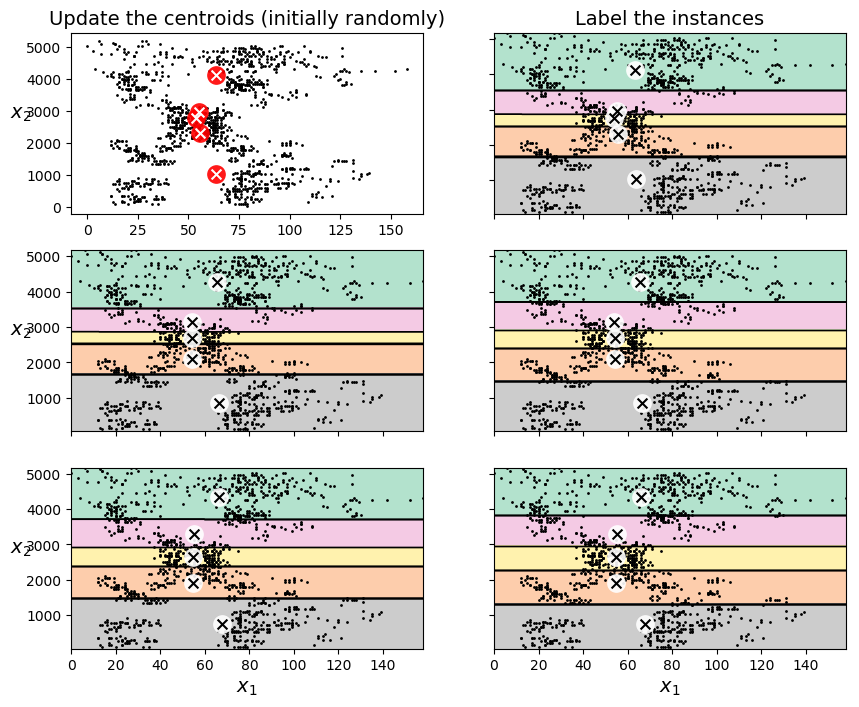

In [366]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=True)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

Why are they only linear boundaries?

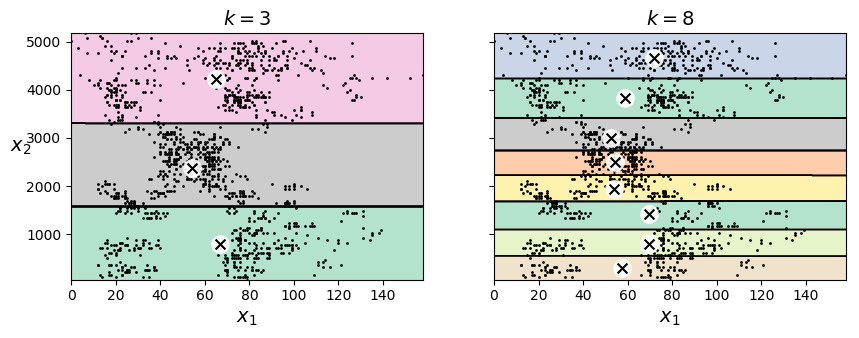

In [367]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
        
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Perform PCA and then clustering algoritm 

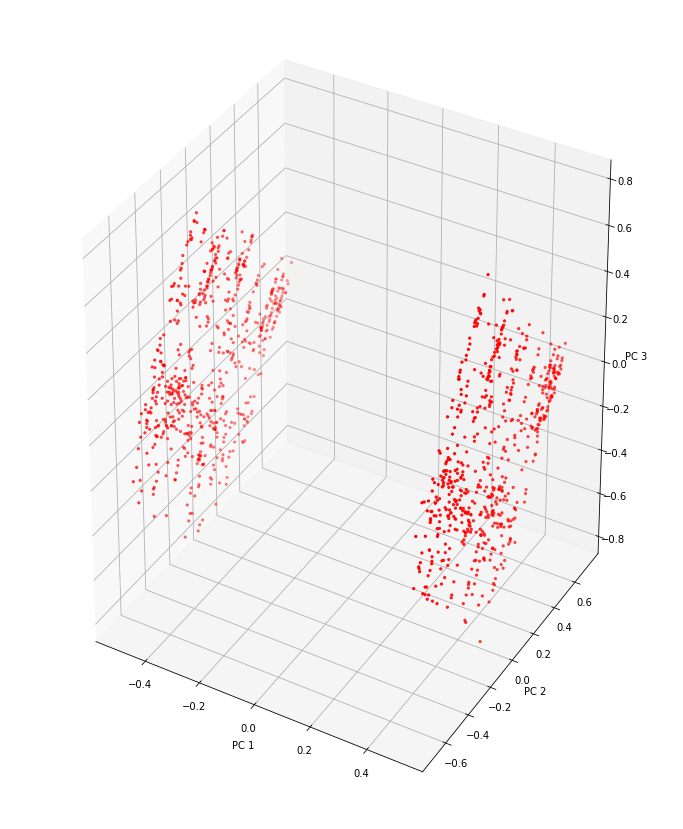

In [372]:
%matplotlib inline

from sklearn import preprocessing
# Normalize data (min/max scaling)
sc = preprocessing.MinMaxScaler()
X_sc = sc.fit_transform(X5)
#X = pd.DataFrame(data_scaled) 

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal3Components = pca.fit_transform(X_sc)

principal3Df = pd.DataFrame(data = principal3Components
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3'], index=X_unsorted.index)

pca.fit(principal3Components)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,15))
ax = fig.add_subplot(111, projection='3d')

x =principal3Df.iloc[:,0]
y =principal3Df.iloc[:,1]
z =principal3Df.iloc[:,2]

ax.scatter(x, y, z, c='r', marker='.')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.view_init(azim=300)

plt.show()



In [373]:
pca.explained_variance_ratio_

array([0.57140009, 0.25199457, 0.17660534])

In [379]:
comps = pd.DataFrame(pca.components_, columns=list(df_num))
comps

,Age,Annual Income,Total Spending
0,1.0,-0.000000e+00,-0.000000e+00
1,-0.0,1.000000e+00,8.258896e-16
2,0.0,-8.842321e-16,1.000000e+00


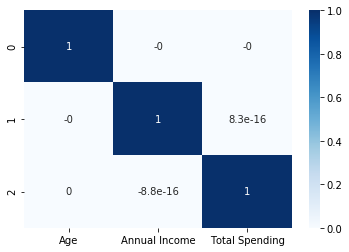

In [381]:
sns.heatmap(comps, cmap="Blues", annot=True)

We can see from above that PC1 is positively correlated with age, and not correlated with the other features

In [391]:
from sklearn import decomposition
from sklearn.decomposition import PCA
pca = decomposition.PCA()
pca_attempt = pca.fit_transform(X5)

pca.explained_variance_ratio_#.sum()

array([9.99514405e-01, 3.98047471e-04, 7.30534025e-05, 1.43729972e-05,
       1.21256074e-07])

In [390]:
comps = pd.DataFrame(pca.components_, columns=['Age','Annual Income', 'Total Spending', 'interest_code', 'gender_code'])
comps

,Age,Annual Income,Total Spending,interest_code,gender_code
0,-0.003541,0.000458,0.999993,0.000732,-0.000006
1,-0.002510,0.999964,-0.000461,-0.008128,0.000285
2,0.999987,0.002530,0.003538,0.002342,0.000801
3,0.002360,-0.008121,0.000744,-0.999964,-0.000774
4,-0.000798,-0.000293,0.000004,-0.000774,0.999999


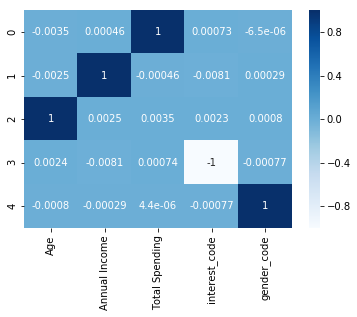

In [392]:
sns.heatmap(comps, cmap="Blues", annot=True)